# TCGA - COAD ML

In [41]:
# import libs
#import libs
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from matplotlib import cm
# PCA Analyis
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from IPython.display import Image
# ML 
from sklearn.model_selection import train_test_split,KFold, StratifiedKFold



In [4]:
# Load in Data + Trnasform Direction
df=pd.read_csv('CONVERTED_COAD_GCM.csv')
df1=df.copy()
df1=df1.transpose()

genes=df1.loc['new_gene'].to_list()
df1.columns=genes

samples=df1.index.to_list()
samples=samples[1:]

df1=df1.drop(['new_gene']).reset_index(drop=True)
df1.index=samples
df1.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,RPS3P6,GSTM2,ST13P11,RANP6,NAP1L1P3,LINC00671,GAPDHP71,COG8,EIF4E2P1,ARHGAP19
TCGA-AA-3662_Healthy,7339,30,1698,885,208,233,2840,3371,1860,1137,...,0,401,0,1,3,5,0,929,0,506
TCGA-A6-2684_Healthy,8191,25,3092,1156,616,251,1355,5737,2442,1664,...,2,214,1,2,4,1,53,1126,0,432
TCGA-A6-5659_Tumor1,3171,45,989,637,186,375,2124,2429,1910,1000,...,2,689,0,0,3,14,1,915,0,472
TCGA-AA-3511_Healthy,15850,63,1951,609,627,46,375,1212,3096,2012,...,0,104,0,0,13,4,0,922,367,411
TCGA-AZ-6600_Healthy,6227,42,5135,519,292,621,2983,4403,2495,1417,...,6,265,1,1,4,3,13,1157,0,495


In [5]:
# Load Data + Set Index - Horz
df=pd.read_csv('CONVERTED_COAD_GCM.csv')
genes=df['new_gene'].to_list() # save as list for futue use
df.index=genes # set index
df.drop(columns=['new_gene'],inplace=True)
df.head(10)

,TCGA-AA-3662_Healthy,TCGA-A6-2684_Healthy,TCGA-A6-5659_Tumor1,TCGA-AA-3511_Healthy,TCGA-AZ-6600_Healthy,TCGA-A6-5667_Tumor,TCGA-A6-2685_Tumor,TCGA-A6-2684_Tumor1,TCGA-AA-3655_Healthy,TCGA-AA-3511_Tumor,...,TCGA-F4-6704_Tumor,TCGA-AA-3712_Healthy,TCGA-A6-5659_Tumor,TCGA-AZ-6598_Healthy,TCGA-A6-5662_Healthy,TCGA-A6-5665_Healthy,TCGA-A6-2686_Healthy,TCGA-AA-3697_Tumor,TCGA-AA-3712_Tumor,TCGA-AA-3713_Tumor
TSPAN6,7339,8191,3171,15850,6227,2731,7111,6794,3920,3491,...,4143,3689,4668,8095,12817,3158,4641,15621,3305,2212
TNMD,30,25,45,63,42,15,39,32,62,32,...,42,41,54,28,55,9,25,356,88,37
DPM1,1698,3092,989,1951,5135,912,2102,1968,1336,1099,...,1332,1000,1646,3878,3408,1417,1109,5922,653,386
SCYL3,885,1156,637,609,519,527,860,959,608,591,...,633,785,1151,596,1095,831,493,773,253,785
C1orf112,208,616,186,627,292,147,423,234,424,201,...,165,122,310,467,1020,426,174,773,117,504
FGR,233,251,375,46,621,257,885,662,177,689,...,494,172,326,185,335,602,248,217,452,166
CFH,2840,1355,2124,375,2983,2916,1339,2907,318,2980,...,2476,1408,2678,528,1379,1270,2653,638,1136,1148
FUCA2,3371,5737,2429,1212,4403,2577,4078,3143,3583,2655,...,2433,3516,5305,3273,4481,3214,3156,4227,2112,880
GCLC,1860,2442,1910,3096,2495,1944,2133,1807,2705,1825,...,1987,1993,2593,2587,3478,2321,1436,3538,743,1858
NFYA,1137,1664,1000,2012,1417,864,1186,1030,1598,1063,...,1053,1142,1471,2219,2279,2368,1106,2053,541,1428


In [17]:
# Create Target vector
samples=df.columns.to_list() # gets sample names

target=[]
sample_names=[]

# loop through and extract tumor(1) + healthy(0)
for i in samples:
    
    name,temp=i.split('_')
    sample_names.append(name)# save names (probablly not needed)
    
    #remove numbers at end
    if temp[-1].isnumeric():
        temp=temp[:-1]
    
    target.append(temp)# save tissues type
    
# Conver to indicies: tumor(1), healthy(0)
target_index=[]
for i in target:
    if i =='Healthy':
        target_index.append(0)
    else:
        target_index.append(1)
        
# Convert to Panda Series
target=pd.Series(target,name='Tissue')

# Visualize Data

Text(0, 0.5, 'Component 2')

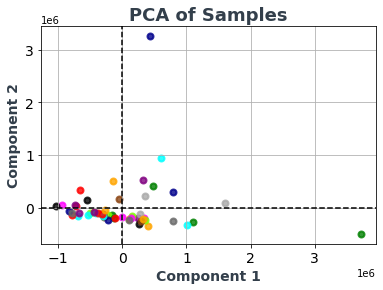

In [13]:
# Generate Colors + numbers
colors=['black','dimgrey','darkgrey',\
       'green','green','cyan','cyan','red','red','orange','orange'\
       ,'purple','purple','lawngreen','lawngreen','darkblue','darkblue'\
       ,'magenta','magenta','saddlebrown','saddlebrown','black','dimgrey','darkgrey',\
       'green','green','cyan','cyan','red','red','orange','orange'\
       ,'purple','purple','lawngreen','lawngreen','darkblue','darkblue'\
       ,'magenta','magenta','saddlebrown','saddlebrown','black','dimgrey','darkgrey',\
       'green','green','cyan','cyan','red','red','orange','orange'\
       ,'purple','purple','lawngreen','lawngreen','darkblue','darkblue'\
       ,'magenta','magenta','saddlebrown','saddlebrown']

num_list=range(0,54)

# PCA 
pca = PCA(n_components=2)
X_r = pca.fit(df1).transform(df1)
# Plot

for color, i, target_name in zip(colors, num_list, samples):
    plt.scatter(X_r[i,0], X_r[i,1], color=color, alpha=.8, lw=2,
                label=target_name)
    
    
plt.title('PCA of Samples', fontsize=18, fontweight='black', color = '#333F4B')
plt.axvline(x=0,linestyle='--',c='k')
plt.axhline(y=0,linestyle='--',c='k')
plt.tick_params(axis='y', which='major', labelsize=14)
plt.tick_params(axis='x', which='major', labelsize=14)
plt.grid(True)
plt.xlabel('Component 1', fontsize=14, fontweight='black', color = '#333F4B')
plt.ylabel('Component 2', fontsize=14, fontweight='black', color = '#333F4B')

In [22]:
# Other Visual 


## Split Data - K Folds Cross Validation

In [38]:
print(np.shape(df1))
print(np.shape(target))

(55, 21083)
(55,)


In [49]:
# Cross Fold Validation
kf = KFold(n_splits = 5)                      
skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True) # Generates indicies

# Show Each Fold (indicies)
for train_index, test_index in skf.split(df1, target):
    print("TRAIN:", train_index, "\nTEST:", test_index,'\n')

TRAIN: [ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 19 21 22 23 24 25 26 27
 29 30 31 32 33 35 36 37 38 39 42 43 44 45 46 47 49 51 52 53] 
TEST: [ 0  8 18 20 28 34 40 41 48 50 54] 

TRAIN: [ 0  2  3  4  5  7  8  9 10 11 12 14 15 17 18 19 20 21 23 25 26 27 28 29
 31 32 33 34 36 37 40 41 42 43 45 46 47 48 49 50 51 52 53 54] 
TEST: [ 1  6 13 16 22 24 30 35 38 39 44] 

TRAIN: [ 0  1  2  5  6  8  9 10 11 12 13 15 16 18 19 20 21 22 24 25 26 28 29 30
 32 33 34 35 36 38 39 40 41 44 45 46 47 48 49 50 51 52 53 54] 
TEST: [ 3  4  7 14 17 23 27 31 37 42 43] 

TRAIN: [ 0  1  3  4  5  6  7  8 10 11 13 14 16 17 18 19 20 21 22 23 24 25 27 28
 29 30 31 32 34 35 37 38 39 40 41 42 43 44 48 49 50 52 53 54] 
TEST: [ 2  9 12 15 26 33 36 45 46 47 51] 

TRAIN: [ 0  1  2  3  4  6  7  8  9 12 13 14 15 16 17 18 20 22 23 24 26 27 28 30
 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 50 51 54] 
TEST: [ 5 10 11 19 21 25 29 32 49 52 53] 



In [39]:
# Show Each Fold
for train_index, val_index in kf.split(np.zeros(n),Y):
    

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


# Deep Learning